In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers,Sequential,models
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
folder_cats = 'cats'
folder_dogs = 'dogs'

Image path: cats/cat.0.jpg


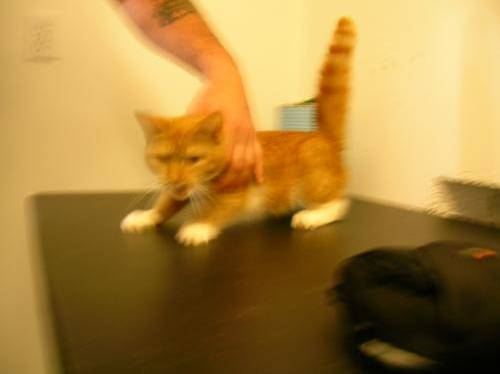

-1

In [ ]:
# first cat image
from google.colab.patches import cv2_imshow
image_path = os.path.join(folder_cats,'cat.0.jpg')
print("Image path:", image_path)
img = cv2.imread(image_path)
cv2_imshow(img)
cv2.waitKey(0)

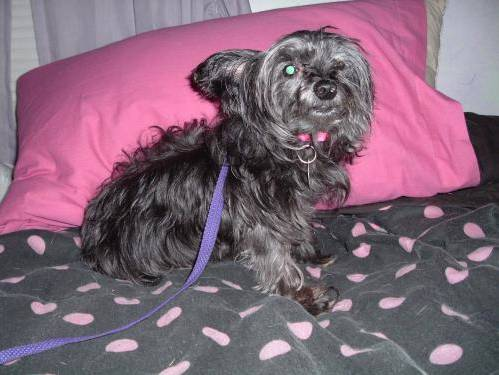

-1

In [ ]:
# first dog image
image_path = os.path.join(folder_dogs, 'dog.0.jpg')
img = cv2.imread(image_path)
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
#Check if images are of same dimension
for x in os.listdir(folder_dogs)[:5]:
    image_path = os.path.join(folder_dogs, x)
    im_read = cv2.imread(image_path)
    print(im_read.shape)

(375, 499, 3)
(239, 320, 3)
(500, 433, 3)
(458, 499, 3)
(499, 428, 3)


In [ ]:
#Check if images are of same dimension
for x in os.listdir(folder_cats)[:5]:
    image_path = os.path.join(folder_cats, x)
    im_read = cv2.imread(image_path)
    print(im_read.shape)

(373, 499, 3)
(210, 313, 3)
(376, 500, 3)
(190, 249, 3)
(493, 499, 3)


* All images have different size ,so we will resize the images

In [ ]:
# resize cats image
data_cats = []
for x in os.listdir(folder_cats):
  image_path = os.path.join(folder_cats, x)
  im_read = cv2.imread(image_path)
  im_read = cv2.resize(im_read,(224,224))
  data_cats.append(im_read)

# resize dogs image
data_dogs=[]
for x in os.listdir(folder_dogs):
  image_path = os.path.join(folder_dogs, x)
  im_read=cv2.imread(image_path)
  im_read=cv2.resize(im_read,(224,224))
  data_dogs.append(im_read)

#Convert list into array, for faster performance
data_cats=np.array(data_cats)
data_dogs=np.array(data_dogs)
data_cats.shape,data_dogs.shape

((1000, 224, 224, 3), (1000, 224, 224, 3))

In [ ]:
# Adding All image in One Place
data=np.vstack((data_cats,data_dogs))
data.shape

(2000, 224, 224, 3)

In [ ]:
# creating the target array
Y = np.append([0]*len(data_cats),[1]*len(data_dogs))
print(Y.shape)

(2000,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,Y,test_size=0.2,random_state=42)
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3) (1600,) (400,)


dog


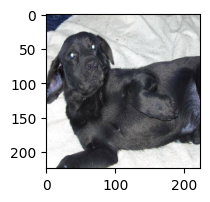

cat


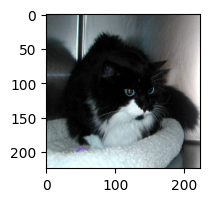

dog


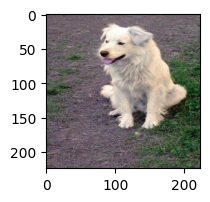

cat


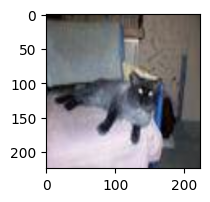

dog


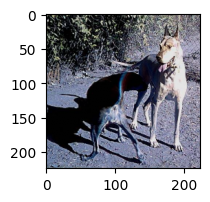

In [ ]:
#Check data after conversion and if they lineup properly
for z in range(5):
    print('dog' if y_test[z]==1 else 'cat')
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[z])
    plt.show()

In [ ]:
#Create new folder where we will save genearted images - remove old ones if existing
def f_recreate_folder():
    dogs_generated_folder='dogs_generated_img'
    cats_generated_folder='cats_generated_img'
    try:
        os.listdir(dogs_generated_folder)
        shutil.rmtree(dogs_generated_folder)
    except Exception as er:
        None

    try:
        os.listdir(cats_generated_folder)
        shutil.rmtree(cats_generated_folder)
    except Exception as er:
        None

    try: os.mkdir(dogs_generated_folder)
    except: None
    try: os.mkdir(cats_generated_folder)
    except: None


    print(f"Wiped out and created folders 1.{dogs_generated_folder}, 2.{cats_generated_folder}")

f_recreate_folder()

Wiped out and created folders 1.dogs_generated_img, 2.cats_generated_img


In [ ]:
dogs_generated_folder='dogs_generated_img'
cats_generated_folder='cats_generated_img'
#Data generator
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                            height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True,
                            fill_mode='nearest')

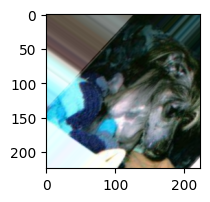

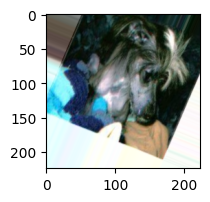

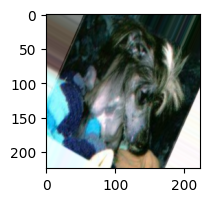

In [ ]:
def f_generate_img(in_img,in_save_folder,in_prefix, in_show_generated=0, in_format='jpg'):
    img = image.img_to_array(in_img)
    img = img.reshape((1,)+img.shape)
    i=0
    for batch in datagen.flow(img, save_to_dir=in_save_folder, save_prefix=in_prefix,save_format=in_format):
        if in_show_generated==1:
            plt.figure(i, figsize=(2,2))
            plot = plt.imshow(image.img_to_array(batch[0]))
        i +=1
        if i==3:
            break
    if in_show_generated==1:
        plt.show()

#Example
f_generate_img(x_train[5],dogs_generated_folder,'dog',1)

In [ ]:
f_recreate_folder()
print('Working on:',end='')
for count,z in enumerate(x_train[::]):
    #Work on every 3rd image
    if count%3==0:
        if y_train[count]==1:
            f_generate_img(z,dogs_generated_folder,'dog',0)
        else:
            f_generate_img(z,cats_generated_folder,'cat',0)
        print(count,end=', ')

Wiped out and created folders 1.dogs_generated_img, 2.cats_generated_img
Working on:0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 444, 447, 450, 453, 456, 459, 462, 465, 468, 471, 474, 477, 480, 483, 486, 489, 492, 495, 498, 501, 504, 507, 510, 513, 516, 519, 522, 525, 528, 531, 534, 537, 540, 543, 546, 549, 552, 555, 558, 561, 564, 567, 570,

In [ ]:
# Addding Generated Data to training
data_dogs=[]
#read cat images and checking their size
for x in os.listdir(dogs_generated_folder):
    im_read=cv2.imread(dogs_generated_folder+"/"+x)
    data_dogs.append(im_read/250)  #normalize the data and add it to the list

#Convert list into array, for faster performance
data_dogs=np.array(data_dogs)
print(data_dogs.shape)

data_cats=[]
#read cat images and check their size
for x in os.listdir(cats_generated_folder):
    im_read=cv2.imread(cats_generated_folder+"/"+x)
    data_cats.append(im_read/250)   #normalize the data and add it to the list

#Convert list into array, for faster performance
data_cats=np.array(data_cats)
print(data_cats.shape)

(794, 224, 224, 3)
(753, 224, 224, 3)


In [ ]:
#Adding Dogs Image
print("Before adding X_train:",x_train.shape)
X_train=np.vstack([x_train,data_dogs])
print("After adding X_train:",X_train.shape)

print("Before adding y_train:",y_train.shape)
y_train=np.hstack([y_train,np.array([1]*len(data_dogs))])
print("After adding y_train:",y_train.shape)

# Adding Cats Data
print("Before adding X_train:",X_train.shape)
X_train=np.vstack([X_train,data_cats])
print("After adding X_train:",X_train.shape)

print("Before adding y_train:",y_train.shape)
y_train=np.hstack([y_train,np.array([0]*len(data_cats))])
print("After adding y_train:",y_train.shape)

Before adding X_train: (1600, 224, 224, 3)
After adding X_train: (2394, 224, 224, 3)
Before adding y_train: (1600,)
After adding y_train: (2394,)
Before adding X_train: (2394, 224, 224, 3)
After adding X_train: (3147, 224, 224, 3)
Before adding y_train: (2394,)
After adding y_train: (3147,)


In [ ]:
del data_cats
del data_dogs

In [ ]:
# VGG16
input_shape_vgg16=(224,224,3)

# loading VGG16 Model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape_vgg16)
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# VGG16 summary
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# create new model with VGG16
model = models.Sequential()
model.add(layers.Input(shape=input_shape_vgg16))
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │       1,254,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,970,179 (60.92 MB)

 Trainable params: 1,255,491 (4.79 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#monitor the validation accuracy for patience=5 epoch, if it doesnt improve after 5 epochs, then stop the training
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1)

# Change the filepath to end with '.keras'
model_cp=ModelCheckpoint(filepath="best_model.keras",monitor="val_accuracy",
                        save_best_only=True, verbose=1)

In [ ]:
newvgg16 = model.fit(X_train,y_train, epochs=10,batch_size=8,
                   validation_data=(x_test,y_test),
                    callbacks=[es,model_cp])

In [ ]:
# predict with confidence
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,(224,224))
    img = np.array(img)
    img = img.reshape((1,)+img.shape)
    img = img / 255
    prediction = model.predict(img)
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1-prediction[0][0]
    if prediction[0][0] > 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'
    return prediction, confidence

In [ ]:
for i in x_test[:10]:
    pred, conf = predict_image(i)
    print(pred, conf)